In [ ]:
#Activity_0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/Wavetronix.csv')

In [3]:
df.head()

,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year
0,1,2022-07-10 00:00:00,NaN,NaN,3.0,59.5,10,2021
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021


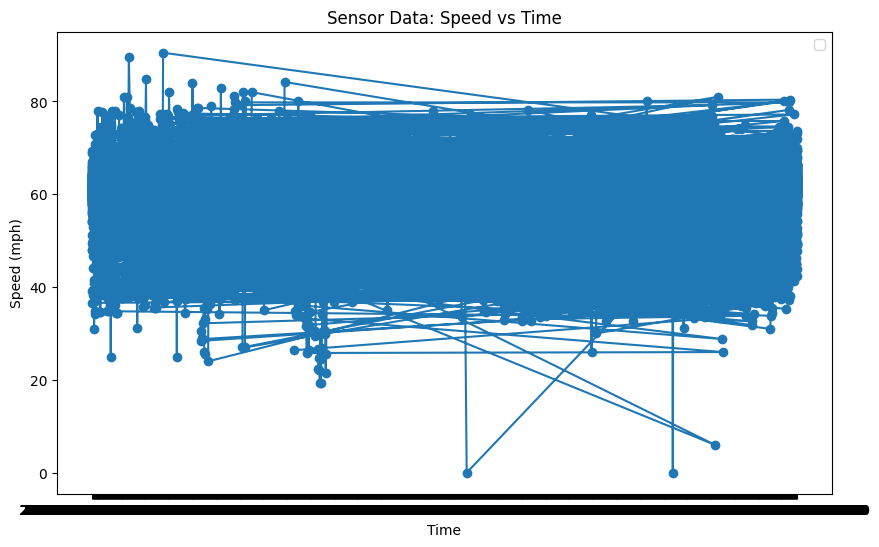

In [11]:
# Plot speed vs. time
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['WAVE-NE-Speed'],'o-')  # adjust the column names if necessary
plt.title('Sensor Data: Speed vs Time')
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.legend()
plt.show()

In [12]:
# Filter the data for only Day 1
df_day_1 = df[df['day'] == 1]

# Display the first few rows of the filtered data
df_day_1.head()


,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year
0,1,2022-07-10 00:00:00,NaN,NaN,3.0,59.5,10,2021
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021


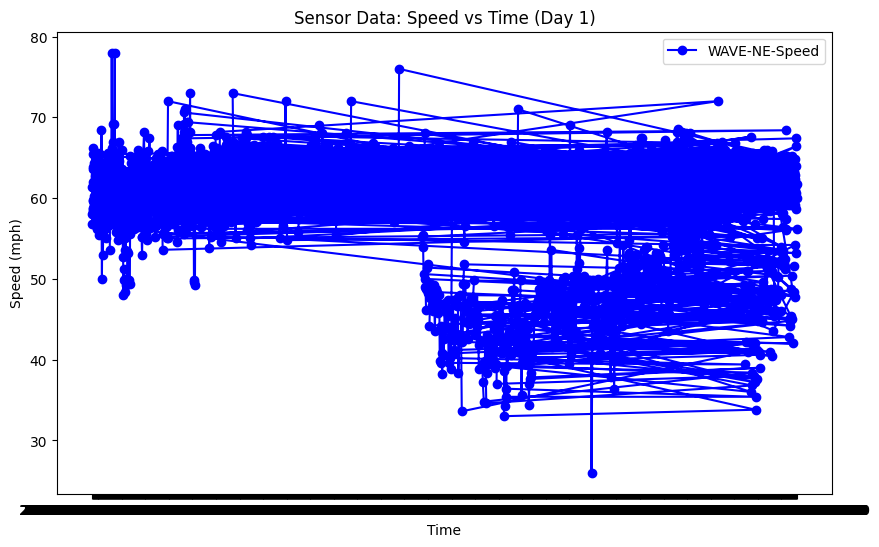

In [17]:
# Plot speed vs. time for Day 1 (for WAVE-NE-Speed)
plt.figure(figsize=(10, 6))
plt.plot(df_day_1['Time'], df_day_1['WAVE-NE-Speed'], 'o-', label='WAVE-NE-Speed', color='blue')
plt.title('Sensor Data: Speed vs Time (Day 1)')
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.legend()
plt.show()

In [22]:
# Filter the speed for only Day 1
speed_limit = df_day_1[df_day_1['WAVE-NE-Speed'] >= 40]
speed_limit2 = df_day_1[df_day_1['WAVE-NE-Speed'] < 40]

# Display the first few rows of the filtered data
df_day_1.head()

,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year
0,1,2022-07-10 00:00:00,NaN,NaN,3.0,59.5,10,2021
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021


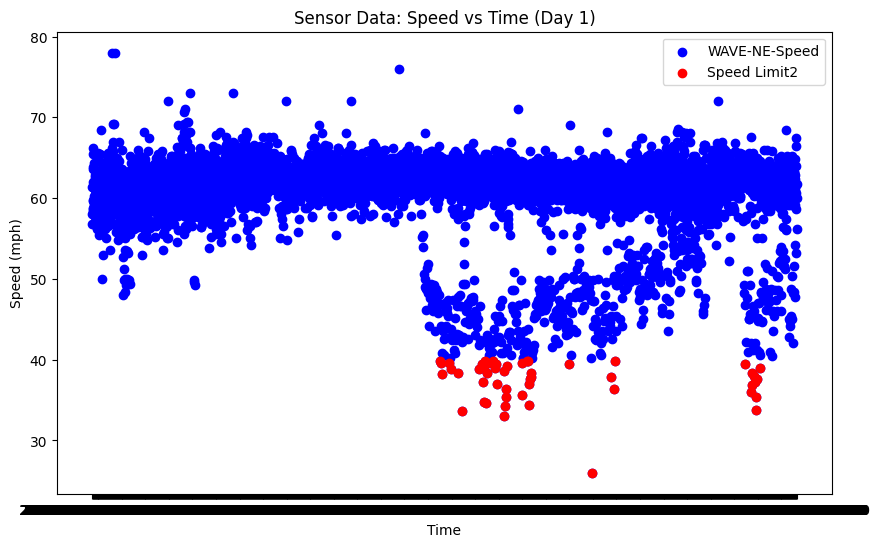

In [23]:
# Plot speed vs. time for Day 1 (for WAVE-NE-Speed)
plt.figure(figsize=(10, 6))
plt.scatter(df_day_1['Time'], df_day_1['WAVE-NE-Speed'], label='WAVE-NE-Speed', color='blue')
plt.scatter(speed_limit2['Time'], speed_limit2['WAVE-NE-Speed'], label='Speed Limit2', color='red')
plt.title('Sensor Data: Speed vs Time (Day 1)')
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.legend()
plt.show()


In [31]:
# Set 'Time' column as the index (optional, but can help with time-based operations)
df_day_1.set_index('Time', inplace=True)

df_day_1=df_day_1.sort_values(by='Time')

# Apply 5-minute rolling average to 'WAVE-NE-Speed' and 'WAVE-SW-Speed'
# Since the data is recorded every minute, a window of 5 represents a 5-minute rolling average
df_day_1['WAVE-NE-Speed-5min-avg'] = df_day_1['WAVE-NE-Speed'].rolling(window=5).mean()


# Reset index back to default (if needed)
df_day_1.reset_index(inplace=True)

# Display the first few rows of the DataFrame with the rolling average
df_day_1.head()

,Time,day,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year,WAVE-NE-Speed-5min-avg
0,2022-07-10 00:00:00,1,NaN,NaN,3.0,59.5,10,2021,NaN
1,2022-07-10 00:00:00,1,7.0,61.4,8.0,63.6,3,2022,NaN
2,2022-07-10 00:00:00,1,8.0,58.0,10.0,62.0,12,2021,NaN
3,2022-07-10 00:00:00,1,11.0,56.8,2.0,60.2,2,2022,NaN
4,2022-07-10 00:01:00,1,10.0,62.0,2.0,59.0,10,2021,NaN


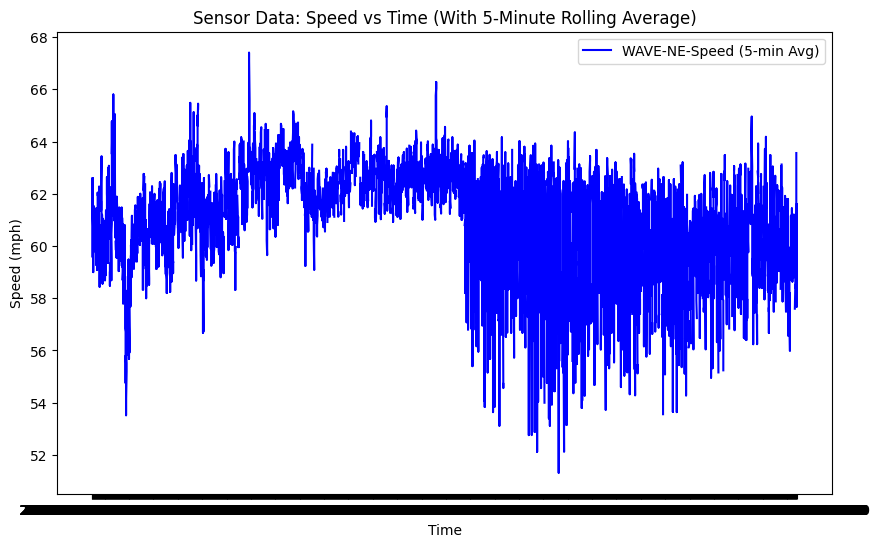

In [35]:
# Plot raw vs. smoothed data for both WAVE-NE and WAVE-SW speeds
plt.figure(figsize=(10, 6))

# Plot smoothed WAVE-NE-Speed (5-minute rolling average)
plt.plot(df_day_1['Time'], df_day_1['WAVE-NE-Speed-5min-avg'], label='WAVE-NE-Speed (5-min Avg)', color='blue')

plt.title('Sensor Data: Speed vs Time (With 5-Minute Rolling Average)')
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.legend()
plt.show()

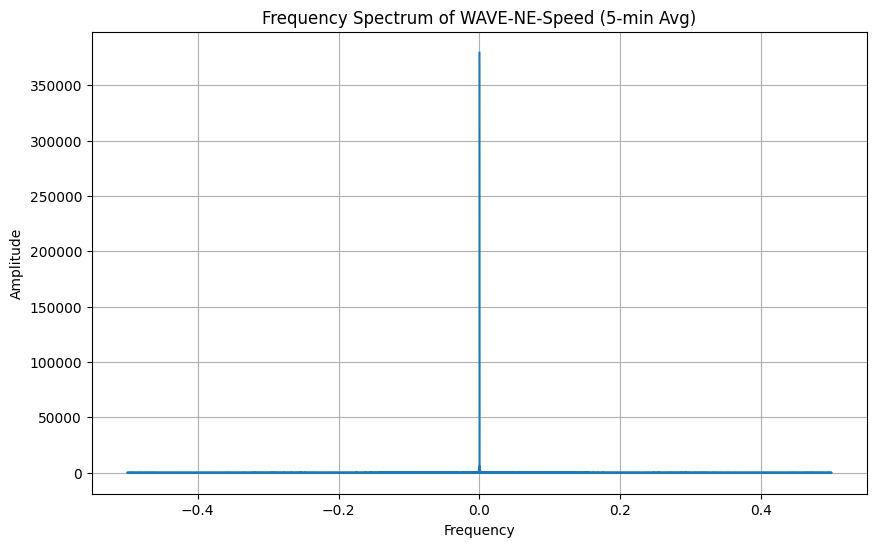

In [38]:
import numpy as np

# Ensure the rolling average is clean by dropping NaN values (from the rolling window)
df_day_1_clean = df_day_1.dropna(subset=['WAVE-NE-Speed-5min-avg'])

# Apply FFT on the smoothed 'WAVE-NE-Speed-5min-avg' data
fft_result = np.fft.fft(df_day_1_clean['WAVE-NE-Speed-5min-avg'].values)

# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(len(fft_result))

# Plot the magnitude of the FFT (to see the frequency spectrum)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Spectrum of WAVE-NE-Speed (5-min Avg)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

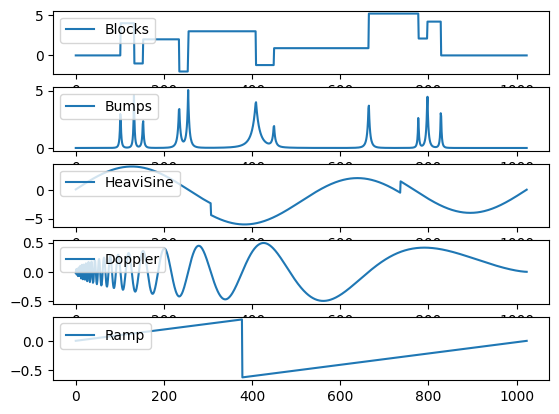

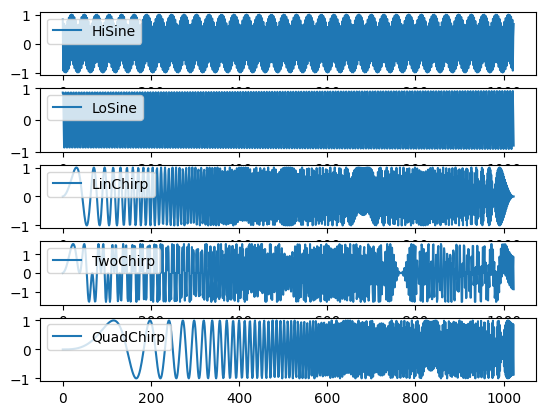

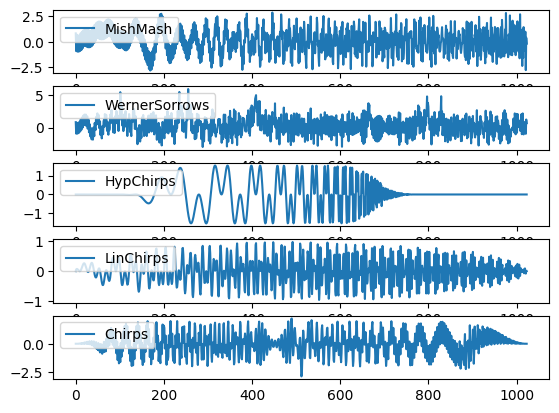

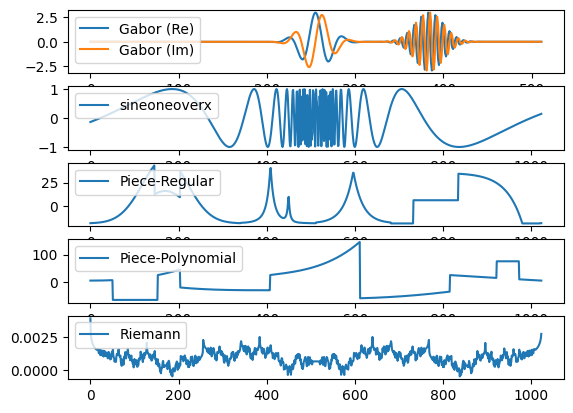

In [40]:
#!/usr/bin/env python

"""Plot the  set of 1D demo signals available in `pywt.data.demo_signal`."""

import matplotlib.pyplot as plt
import numpy as np

import pywt

# use 'list' to get a list of all available 1d demo signals
signals = pywt.data.demo_signal('list')

subplots_per_fig = 5
signal_length = 1024
i_fig = 0
n_figures = int(np.ceil(len(signals)/subplots_per_fig))
for i_fig in range(n_figures):
    # Select a subset of functions for the current plot
    func_subset = signals[
        i_fig * subplots_per_fig:(i_fig + 1) * subplots_per_fig]

    # create a figure to hold this subset of the functions
    fig, axes = plt.subplots(subplots_per_fig, 1)
    axes = axes.ravel()
    for n, signal in enumerate(func_subset):
        if signal in ['Gabor', 'sineoneoverx']:
            # user cannot specify a length for these two
            x = pywt.data.demo_signal(signal)
        else:
            x = pywt.data.demo_signal(signal, signal_length)
        ax = axes[n]
        ax.plot(x.real)
        if signal == 'Gabor':
            # The Gabor signal is complex-valued
            ax.plot(x.imag)
            ax.legend(['Gabor (Re)', 'Gabor (Im)'], loc='upper left')
        else:
            ax.legend([signal, ], loc='upper left')
    # omit axes for any unused subplots
    for n in range(n + 1, len(axes)):
        axes[n].set_axis_off()
plt.show()

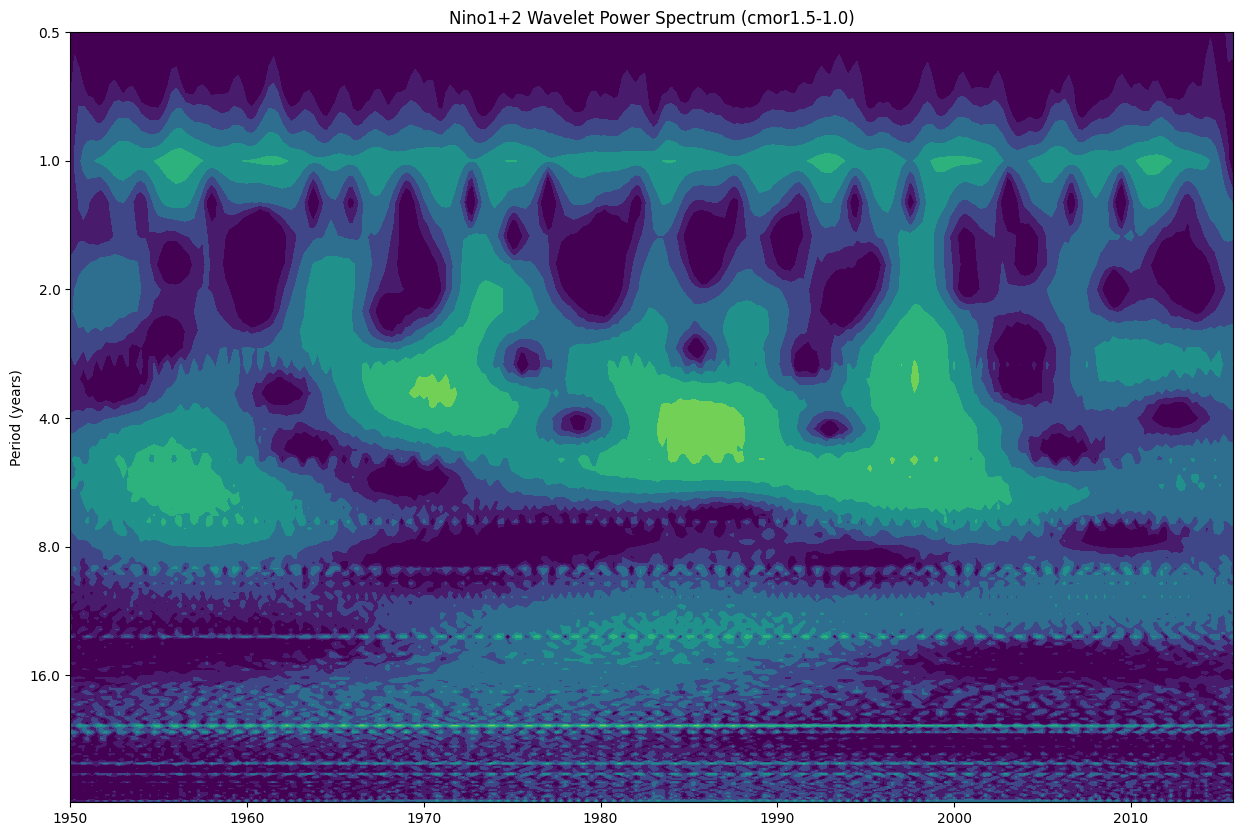

In [41]:
#!/usr/bin/env python

import matplotlib.pyplot as plt
import numpy as np

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title(f'Nino1+2 Wavelet Power Spectrum ({wavelet})')
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.2 MB/s eta 0:00:00


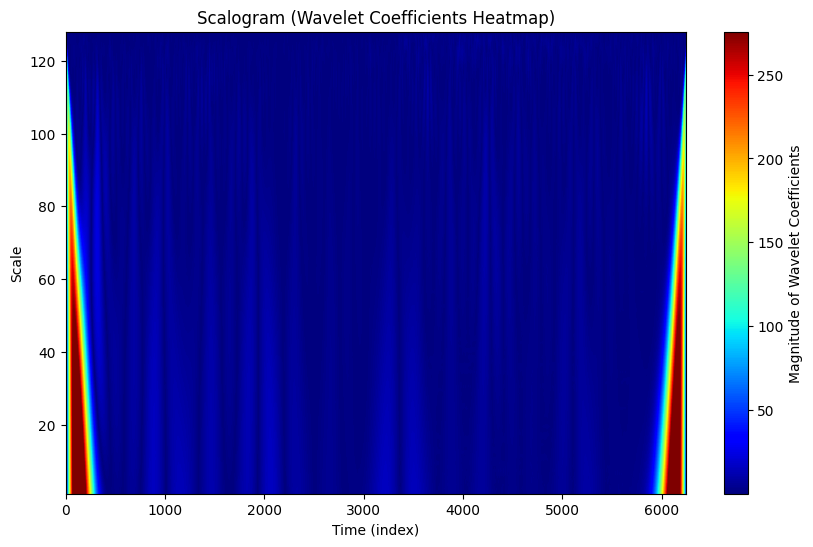

In [39]:
# Install PyWavelets if not installed
!pip install PyWavelets

import pywt

# Ensure the rolling average is clean by dropping NaN values (from the rolling window)
df_day_1_clean = df_day_1.dropna(subset=['WAVE-NE-Speed-5min-avg'])

# Extract the WAVE-NE-Speed data (or any other signal you're interested in)
signal = df_day_1_clean['WAVE-NE-Speed-5min-avg'].values

# Define scales for the CWT (these control the frequency resolution)
scales = np.arange(1, 128)

# Perform the Continuous Wavelet Transform (CWT) using the Mexican hat ('mexh') wavelet
coefficients, frequencies = pywt.cwt(signal, scales, 'mexh')

# Plot the scalogram (heatmap of the wavelet coefficients)
plt.figure(figsize=(10, 6))

# Show the scalogram using a heatmap
plt.imshow(np.abs(coefficients), extent=[0, len(signal), 1, 128], cmap='jet', aspect='auto',
           vmax=np.percentile(np.abs(coefficients), 99))  # Clip the high-end values for better visualization

plt.colorbar(label='Magnitude of Wavelet Coefficients')
plt.title('Scalogram (Wavelet Coefficients Heatmap)')
plt.xlabel('Time (index)')
plt.ylabel('Scale')
plt.show()


In [42]:
!pip install requests Pillow pywt


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [43]:
import requests

# URL of the image
url = 'https://github.com/barkham21/ai4ccee_fall_2024/blob/main/in_class_activity/lecture4/2018-06-30-19-05.jpg?raw=true'

# Download the image
response = requests.get(url)

# Save the image locally
with open('image.jpg', 'wb') as f:
    f.write(response.content)


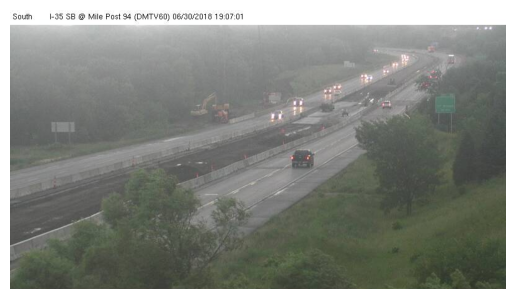

In [44]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('image.jpg')

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axes for better visualization
plt.show()


In [45]:
import numpy as np

# Convert the image to a NumPy array
image_np = np.array(image)

# Check the shape of the array
print(f"Image shape: {image_np.shape}")


Image shape: (450, 800, 3)


In [46]:
import pywt

# Convert the image to grayscale for DWT
image_gray = image.convert('L')
image_gray_np = np.array(image_gray)

# Perform 2D Discrete Wavelet Transform using the Haar wavelet
coeffs2 = pywt.dwt2(image_gray_np, 'haar')

# Extract approximation and detail coefficients
LL, (LH, HL, HH) = coeffs2


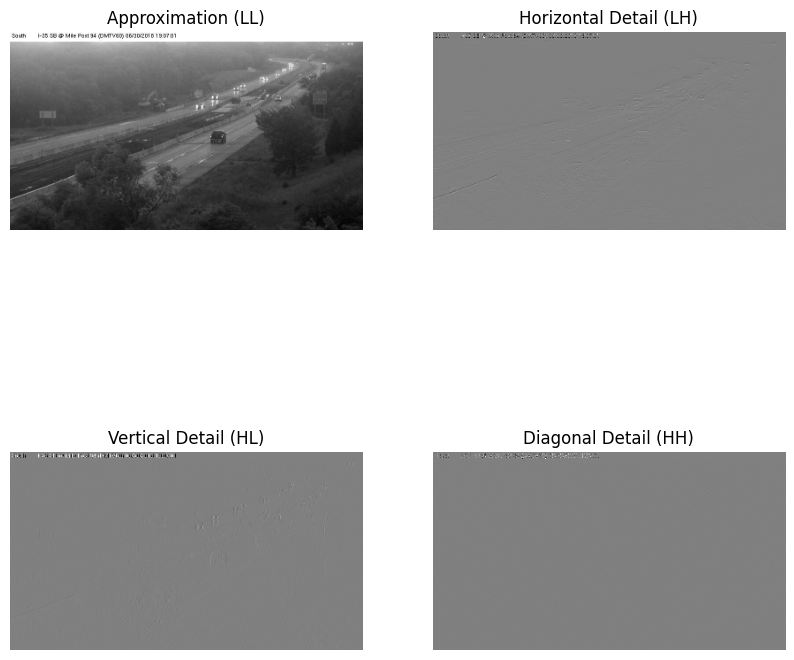

In [47]:
# Plot the approximation and detail coefficients
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot approximation coefficients (LL)
axes[0, 0].imshow(LL, cmap='gray')
axes[0, 0].set_title('Approximation (LL)')
axes[0, 0].axis('off')

# Plot horizontal detail coefficients (LH)
axes[0, 1].imshow(LH, cmap='gray')
axes[0, 1].set_title('Horizontal Detail (LH)')
axes[0, 1].axis('off')

# Plot vertical detail coefficients (HL)
axes[1, 0].imshow(HL, cmap='gray')
axes[1, 0].set_title('Vertical Detail (HL)')
axes[1, 0].axis('off')

# Plot diagonal detail coefficients (HH)
axes[1, 1].imshow(HH, cmap='gray')
axes[1, 1].set_title('Diagonal Detail (HH)')
axes[1, 1].axis('off')

# Show the plots
plt.show()
